# ***Daily Household Transactions***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("Daily Household Transactions.csv")
data.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [3]:
data.tail()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
2456,1/1/2015,Cash,Transportation,NaN,share jeep - Place T base to top,20.0,Expense,INR
2457,1/1/2015,Cash,Transportation,NaN,share auto - Place H to Place T base,20.0,Expense,INR
2458,1/1/2015,Cash,Transportation,NaN,bus - brc to Place H,30.0,Expense,INR
2459,1/1/2015,Cash,Food,NaN,tea,10.0,Expense,INR
2460,1/1/2015,Cash,Transportation,NaN,share auto - hospital to brc station,10.0,Expense,INR


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     1826 non-null   object 
 4   Note            1940 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB


In [8]:

data.dropna(subset=['Date'], inplace=True)

In [10]:
data.shape

(2461, 8)

In [12]:
data.isnull().sum()

,0
Date,0
Mode,0
Category,0
Subcategory,635
Note,521
Amount,0
Income/Expense,0
Currency,0


In [15]:
data['Mode'] = data['Mode'].str.strip().str.title()
print(data["Mode"])

0                        Cash
1                        Cash
2       Saving Bank Account 1
3       Saving Bank Account 1
4                        Cash
                ...          
2456                     Cash
2457                     Cash
2458                     Cash
2459                     Cash
2460                     Cash
Name: Mode, Length: 2461, dtype: object


In [19]:
import pandas as pd
data['Date'] = pd.to_datetime(data['Date'], format='mixed', dayfirst=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            2461 non-null   datetime64[ns]
 1   Mode            2461 non-null   object        
 2   Category        2461 non-null   object        
 3   Subcategory     1826 non-null   object        
 4   Note            1940 non-null   object        
 5   Amount          2461 non-null   float64       
 6   Income/Expense  2461 non-null   object        
 7   Currency        2461 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 153.9+ KB


In [22]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Weekday'] = data['Date'].dt.day_name()
data['Amount'] = data['Amount'].astype(float)
data['Expense_Amount'] = data.apply(lambda x: x['Amount'] if x['Income/Expense'] == 'Expense' else 0, axis=1)
data['Income_Amount'] = data.apply(lambda x: x['Amount'] if x['Income/Expense'] == 'Income' else 0, axis=1)


In [26]:
print(data['Expense_Amount'])

0        30.0
1        60.0
2       199.0
3        19.0
4       251.0
        ...  
2456     20.0
2457     20.0
2458     30.0
2459     10.0
2460     10.0
Name: Expense_Amount, Length: 2461, dtype: float64


In [28]:
print(data['Category'].value_counts())

Category
Food                         907
Transportation               307
Household                    176
subscription                 143
Other                        126
Investment                   103
Health                        94
Family                        71
Apparel                       47
Recurring Deposit             47
Money transfer                43
Salary                        43
Gift                          30
Public Provident Fund         29
Equity Mutual Fund E          22
Beauty                        22
Gpay Reward                   21
Education                     18
Saving Bank account 1         17
maid                          17
Festivals                     16
Equity Mutual Fund A          14
Equity Mutual Fund F          13
Dividend earned on Shares     12
Interest                      12
Culture                       11
Small Cap fund 2              10
Small cap fund 1              10
Share Market                   8
Life Insurance                 7
M

In [29]:
print(data[['Date', 'Year', 'Month', 'Day', 'Weekday']].head())

                 Date  Year  Month  Day    Weekday
0 2018-09-20 12:04:08  2018      9   20   Thursday
1 2018-09-20 12:03:15  2018      9   20   Thursday
2 2018-09-19 00:00:00  2018      9   19  Wednesday
3 2018-09-17 23:41:17  2018      9   17     Monday
4 2018-09-16 17:15:08  2018      9   16     Sunday


In [30]:
print(data[['Amount', 'Income/Expense', 'Expense_Amount', 'Income_Amount']].head())

   Amount Income/Expense  Expense_Amount  Income_Amount
0    30.0        Expense            30.0            0.0
1    60.0        Expense            60.0            0.0
2   199.0        Expense           199.0            0.0
3    19.0        Expense            19.0            0.0
4   251.0        Expense           251.0            0.0


In [32]:
total_income = data['Income_Amount'].sum()
total_expense = data['Expense_Amount'].sum()

print(f"Total Income: ₹{total_income:,.2f}")
print(f"Total Expense: ₹{total_expense:,.2f}")

Total Income: ₹3,042,397.35
Total Expense: ₹1,957,390.53


In [35]:

monthly_data = data.groupby(['Year', 'Month'])[['Income_Amount', 'Expense_Amount']].sum().reset_index()
monthly_data['Year-Month'] = pd.to_datetime(monthly_data[['Year', 'Month']].assign(DAY=1))

print(monthly_data[['Year-Month', 'Income_Amount', 'Expense_Amount']].head())

  Year-Month  Income_Amount  Expense_Amount
0 2015-01-01            0.0         33870.0
1 2015-02-01        49806.0         24308.0
2 2015-03-01        70806.0         32631.4
3 2015-04-01        49306.0         24222.0
4 2015-05-01        47859.0         63118.0


In [41]:
top_expense_categories = data.groupby('Category')['Expense_Amount'].sum().sort_values(ascending=False).head(10)
print(top_expense_categories)

Category
Money transfer           606528.90
Investment               271858.00
Transportation           169053.78
Household                161645.58
subscription             114587.91
Food                      96403.10
Public Provident Fund     90000.00
Other                     87025.28
Family                    78582.20
Health                    66252.75
Name: Expense_Amount, dtype: float64


In [39]:

weekly_spending = data.groupby('Weekday')['Expense_Amount'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
print(weekly_spending)

Weekday
Monday       288547.90
Tuesday      350667.87
Wednesday    224663.85
Thursday     311200.50
Friday       216007.28
Saturday     200424.41
Sunday       365878.72
Name: Expense_Amount, dtype: float64


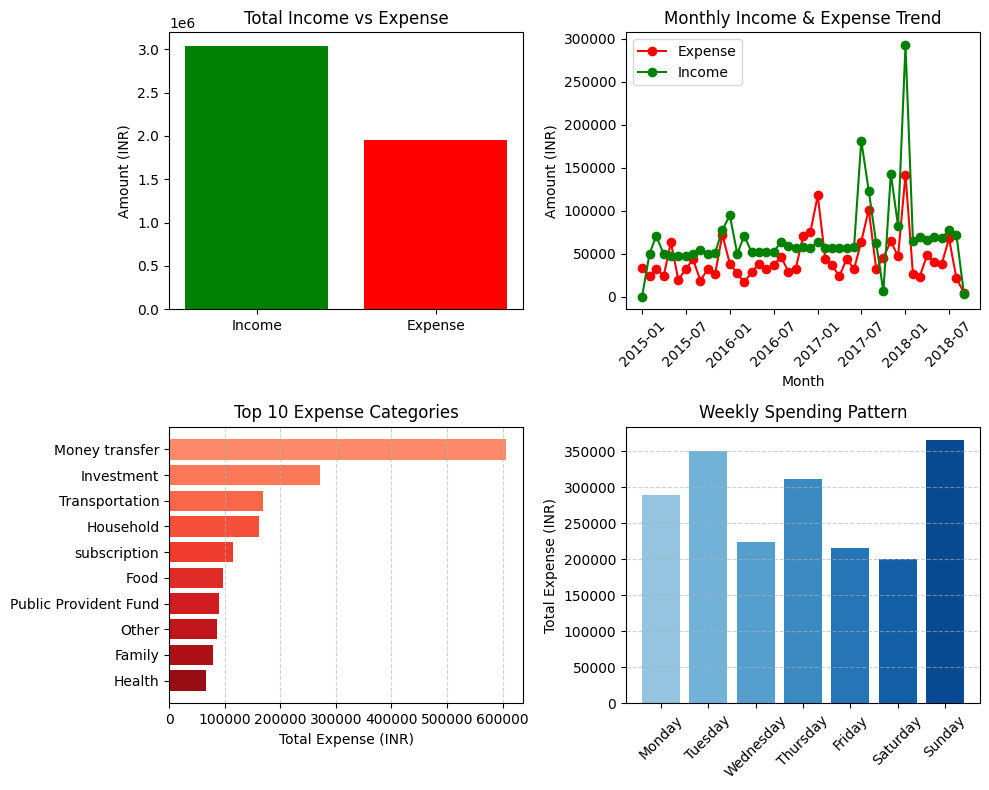

In [54]:
import numpy as np
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# 1. Total Income vs Expense (Top-Left)
axs[0, 0].bar(['Income', 'Expense'], [total_income, total_expense], color=['green', 'red'])
axs[0, 0].set_title('Total Income vs Expense')
axs[0, 0].set_ylabel('Amount (INR)')

# 2. Monthly Income & Expense Trend (Top-Right)
axs[0, 1].plot(monthly_data['Year-Month'], monthly_data['Expense_Amount'], label='Expense', color='red', marker='o')
axs[0, 1].plot(monthly_data['Year-Month'], monthly_data['Income_Amount'], label='Income', color='green', marker='o')
axs[0, 1].set_title('Monthly Income & Expense Trend')
axs[0, 1].set_xlabel('Month')
axs[0, 1].set_ylabel('Amount (INR)')
axs[0, 1].legend()
axs[0, 1].tick_params(axis='x', rotation=45)

# 3. Top 10 Expense Categories (Bottom-Left)
colors = plt.cm.Reds(np.linspace(0.4, 0.9, len(top_expense_categories)))
axs[1, 0].barh(top_expense_categories.index, top_expense_categories.values, color=colors)
axs[1, 0].set_title('Top 10 Expense Categories')
axs[1, 0].set_xlabel('Total Expense (INR)')
axs[1, 0].invert_yaxis()
axs[1, 0].grid(axis='x', linestyle='--', alpha=0.6)

# 4. Weekly Expense Pattern (Bottom-Right)
colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(weekly_spending)))
axs[1, 1].bar(weekly_spending.index, weekly_spending.values, color=colors)
axs[1, 1].set_title('Weekly Spending Pattern')
axs[1, 1].set_ylabel('Total Expense (INR)')
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


<Figure size 1000x800 with 0 Axes>

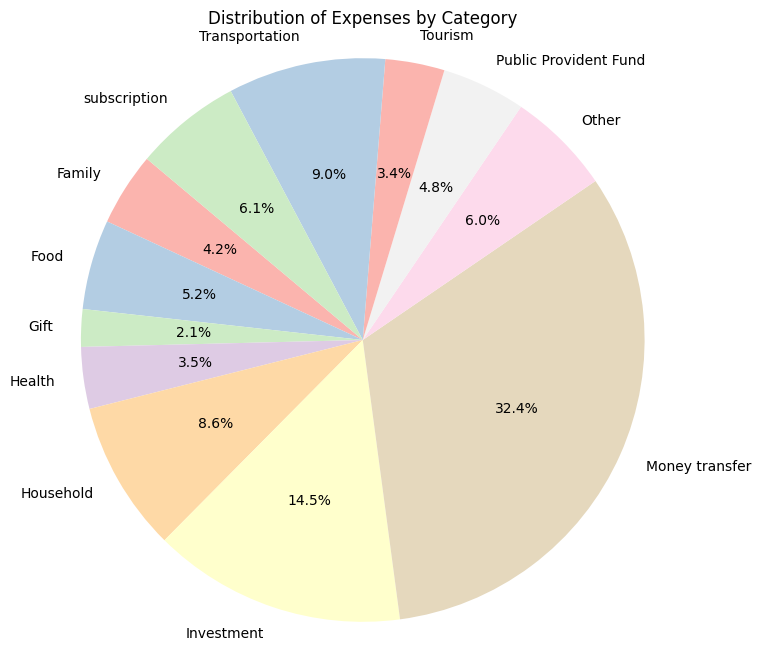

In [52]:
plt.figure(figsize=(10,8))
threshold = data['Expense_Amount'].sum() * 0.02
expense_categories_filtered = data.groupby('Category')['Expense_Amount'].sum()
other_expenses = expense_categories_filtered[expense_categories_filtered < threshold].sum()
expense_categories_filtered = expense_categories_filtered[expense_categories_filtered >= threshold]

if other_expenses > 0:
    expense_categories_filtered['Other'] = other_expenses

plt.figure(figsize=(8, 8))
plt.pie(expense_categories_filtered, labels=expense_categories_filtered.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Distribution of Expenses by Category')
plt.axis('equal')
plt.show()

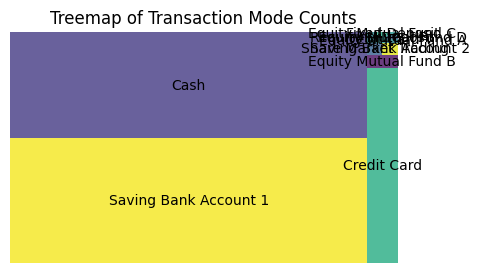

In [59]:
!pip install squarify
import squarify
import matplotlib.pyplot as plt

mode_counts = data['Mode'].value_counts()

# Create the treemap
plt.figure(figsize=(5, 3))
squarify.plot(sizes=mode_counts.values, label=mode_counts.index, alpha=.8 )
plt.title('Treemap of Transaction Mode Counts')
plt.axis('off')
plt.show()

In [65]:
data['Hour'] = pd.to_datetime(data['Date']).dt.hour

def categorize_hour(hour):
  if 5 <= hour < 12:
    return 'Morning'
  elif 12 <= hour < 17:
    return 'Afternoon'
  elif 17 <= hour < 21:
    return 'Evening'
  else:
    return 'Night'

data['Time_Category'] = data['Hour'].apply(categorize_hour)

print(data[['Date', 'Hour', 'Time_Category']].head())
print(data['Time_Category'].value_counts())

                 Date  Hour Time_Category
0 2018-09-20 12:04:08    12     Afternoon
1 2018-09-20 12:03:15    12     Afternoon
2 2018-09-19 00:00:00     0         Night
3 2018-09-17 23:41:17    23         Night
4 2018-09-16 17:15:08    17       Evening
Time_Category
Night        1387
Morning       413
Evening       380
Afternoon     281
Name: count, dtype: int64


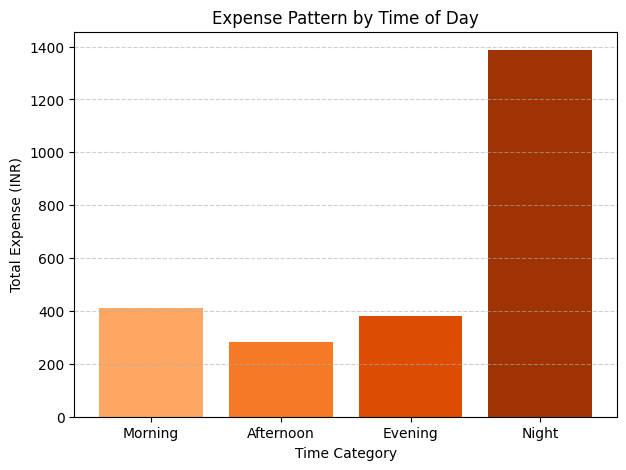

In [70]:
import numpy as np
time_category_spending = data.groupby('Time_Category')['Expense_Amount'].count().reindex(
    ['Morning', 'Afternoon', 'Evening', 'Night'])
plt.figure(figsize=(7, 5))
plt.bar(time_category_spending.index, time_category_spending.values, color=colors)
plt.title('Expense Pattern by Time of Day')
plt.xlabel('Time Category')
plt.ylabel('Total Expense (INR)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()